- [ ] think about good labels and titles

In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from load import load_pseudo, load_staph, load_nucleotides

%matplotlib inline

In [2]:
records_pseudo = load_pseudo()
records_staph = load_staph()

In [3]:
def show_count(ax, rects, format='{}'):
    '''Show the height of each bar in the bar chart'''
    for rect in rects:
        height = rect.get_height()
        ax.annotate(format.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    ha='center', va='bottom')

# The distribution of classes

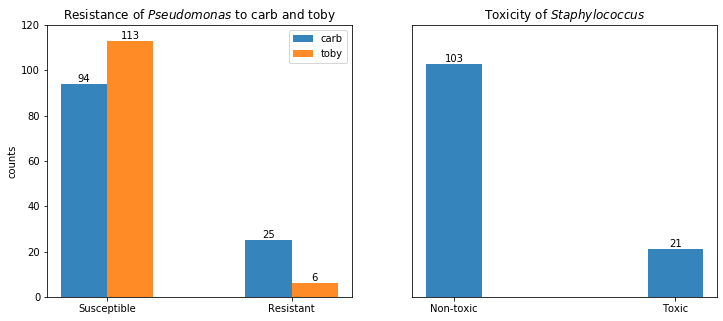

In [4]:
plt.figure(figsize=(12, 5))

# pseudo
plt.subplot('121')
x = np.array([0, 1]) # False, True
counts_carb = records_pseudo['carb'].value_counts()
carb = plt.bar(x=x-0.125, height=counts_carb, width=0.25, alpha=0.9, label='carb')
counts_toby = records_pseudo['toby'].value_counts()
toby = plt.bar(x=x+0.125, height=counts_toby, width=0.25, alpha=0.9, label='toby')
show_count(plt.gca(), carb)
show_count(plt.gca(), toby)
plt.xticks(x, ['Susceptible', 'Resistant'])
plt.ylim((0, 120))
plt.ylabel('counts')
plt.title('Resistance of $Pseudomonas$ to carb and toby')
plt.legend()

#staph
plt.subplot('122')
resp_counts = records_staph['resp'].value_counts()
rects = plt.bar(x=x, height=resp_counts, width=0.25, alpha=0.9)
show_count(plt.gca(), rects)
plt.xticks(x, ['Non-toxic', 'Toxic'])
plt.ylim((0, 120))
plt.yticks([])
plt.title('Toxicity of $Staphylococcus$')

plt.show()

# The missingness distribution

In [5]:
def missingness(ax, data):
    n, bins, patches = ax.hist(data, bins=30, alpha=0.9)
    mu, sigma = np.mean(data), np.std(data)
    ax.grid(True)
    x = sum(ax.get_xlim()) / 2
    y = sum(ax.get_ylim()) / 1.5
    ax.set_xlabel('missing percentage (%)')
    ax.text(mu, y, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

In [6]:
def contrast_missingness(before, after, name):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    missingness(ax1, before)
    ax1.set_ylabel('counts')
    ax1.set_title('no imputation')
    missingness(ax2, after)
    ax2.set_title('naive imputation')

    fig.suptitle('Distribution of nucleotide missing percentage in ${}$'.format(name))
    plt.show()

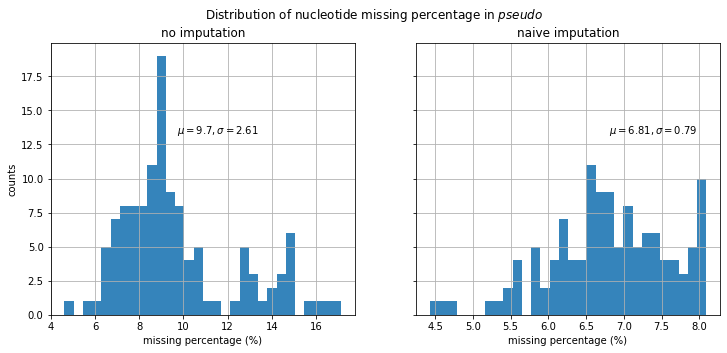

In [7]:
contrast_missingness(records_pseudo['missing_%'], records_pseudo['missing_%_i'], 'pseudo')

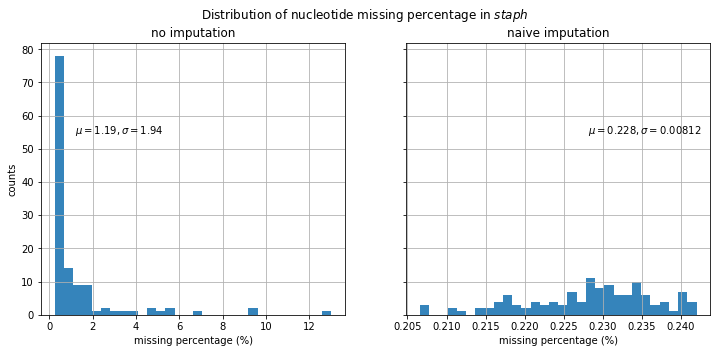

In [8]:
contrast_missingness(records_staph['missing_%'], records_staph['missing_%_i'], 'staph')

# Individual missingness

In [9]:
def individual_missingness(records, name):
    plt.figure(figsize=(19.2, 4.8))
    l = records.shape[0]
    o = plt.scatter(range(l), records['missing_%'])
    i = plt.scatter(range(l), records['missing_%_i'])

    plt.legend(handles=[o, i], labels=['original', 'imputed'])
    plt.xlim((-1, records.shape[0]))
    plt.ylim((0, np.ceil(np.max(records['missing_%']))))
    plt.xticks(ticks=range(l), labels=records['id'].to_list(), rotation=90, fontsize=9)
    plt.ylabel('missing percentage (%)')
    plt.title('Individual missing nucleotide percentage in ${}$'.format(name))
    plt.grid(axis='y')
    plt.show()

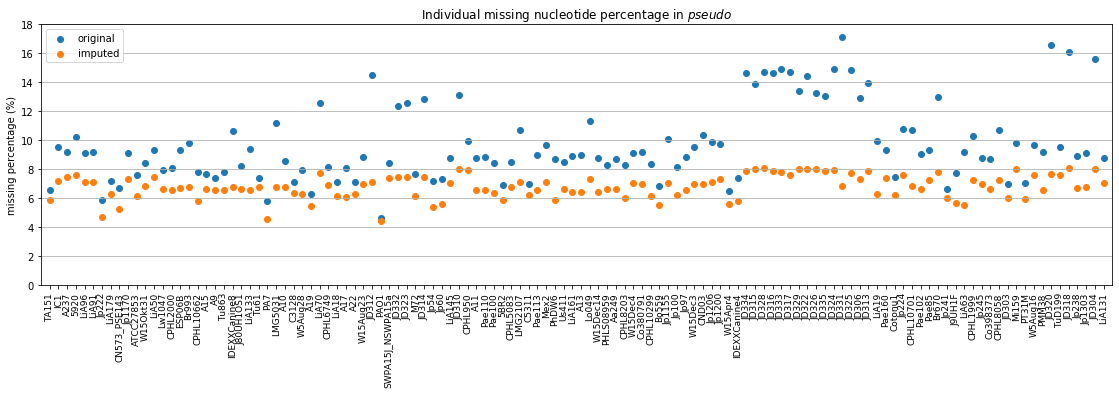

In [10]:
individual_missingness(records_pseudo, 'pseudo')

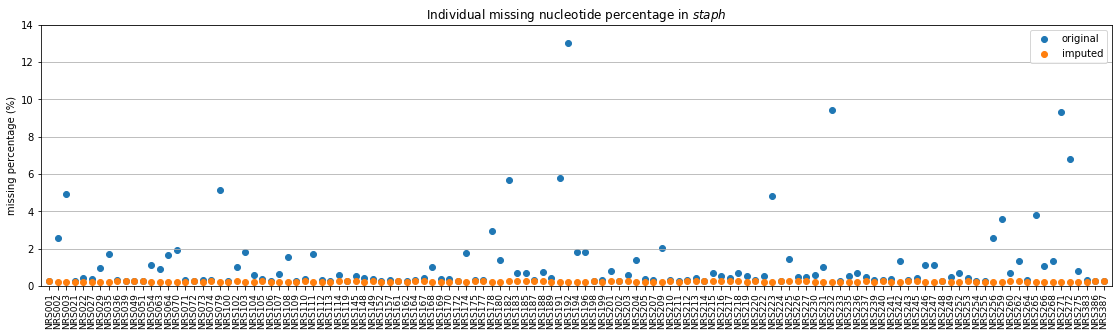

In [11]:
individual_missingness(records_staph, 'staph')

# Nucleotide ratios

In [12]:
def n_count(sequences):
    c = Counter()
    for seq in sequences:
        c.update(Counter(seq))
    return c

In [13]:
c_pseudo = n_count(records_pseudo['sequence'])
c_pseudo_i = n_count(records_pseudo['sequence_i'])
c_staph = n_count(records_staph['sequence'])
c_staph_i = n_count(records_staph['sequence_i'])

In [14]:
def n_pct(ax, data):
    total = pd.Series(data)
    total /= (total.sum() / 100)
    rects = ax.bar(x=total.index, height=total, alpha=0.9)
    ax.set_xlabel('nucleotides')
    show_count(ax, rects, '{:.4}%')

In [15]:
def contrast_n_pct(before, after, name):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    n_pct(ax0, before)
    ax0.set_title('no imputation')
    ax0.set_ylabel('percentage (%)')
    n_pct(ax1, after)
    ax1.set_title('naive imputation')
    fig.suptitle('Composition of ${}$'.format(name))

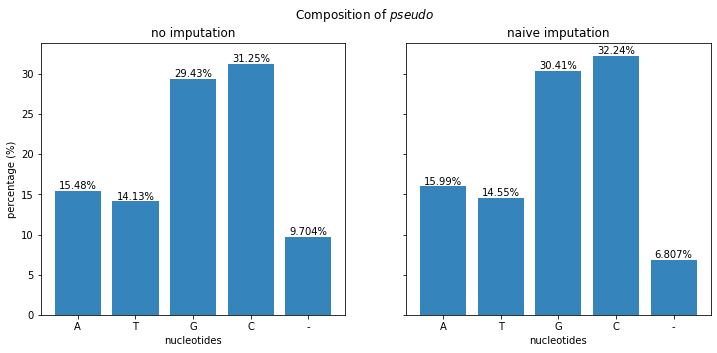

In [16]:
contrast_n_pct(c_pseudo, c_pseudo_i, 'pseudo')

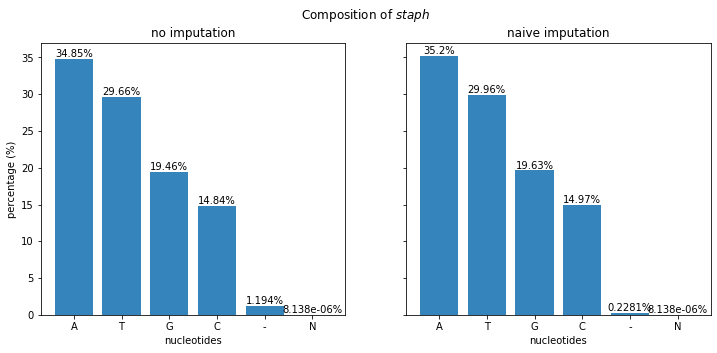

In [17]:
contrast_n_pct(c_staph, c_staph_i, 'staph')

# Gene variations

In [18]:
## 45 seconds * 2 + 1.5 minutes *2 = 4.5 minutes
# sequence_pseudo = load_nucleotides('../data/pseudo/concatenated.fasta')
# sequence_pseudo_i = load_nucleotides('../data/pseudo/concatenated_naive_impute.fasta')
# sequence_staph = load_nucleotides('../data/staph/core_gene_alignment-narsa.aln')
# sequence_staph_i = load_nucleotides('../data/staph/core_gene_alignment-narsa_naive_impute.fasta')
## 45 seconds * 2 + 1.5 minutes *2 = 4.5 minutes
# variations_pseudo = sequence_pseudo.nunique()
# variations_pseudo_i = sequence_pseudo_i.nunique()
# variations_staph = sequence_staph.nunique()
# variations_staph_i = sequence_staph_i.nunique()

In [19]:
# np.save('../data/pseudo_variation_o.npy', variations_pseudo)
# np.save('../data/pseudo_variation_i.npy', variations_pseudo_i)
# np.save('../data/staph_variation_o.npy', variations_staph)
# np.save('../data/staph_variation_i.npy', variations_staph_i)

In [20]:
variations_pseudo = np.load('../data/pseudo_variation_o.npy')
variations_pseudo_i = np.load('../data/pseudo_variation_i.npy')
variations_staph = np.load('../data/staph_variation_o.npy')
variations_staph_i = np.load('../data/staph_variation_i.npy')

In [21]:
def variation(ax, variation):
    counts = np.bincount(variation)
    rects = ax.bar(range(len(counts)), counts)
    ax.set_xlabel('number of different nucleotides at a locus')
    show_count(ax, rects)

In [22]:
def contrast_variation(before, after, name):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 5))
    variation(ax0, before)
    ax0.set_title('no imputation')
    ax0.set_ylabel('counts')
    variation(ax1, after)
    ax1.set_title('navie imputation')
    fig.suptitle('Distribution of gene variations in ${}$'.format(name))

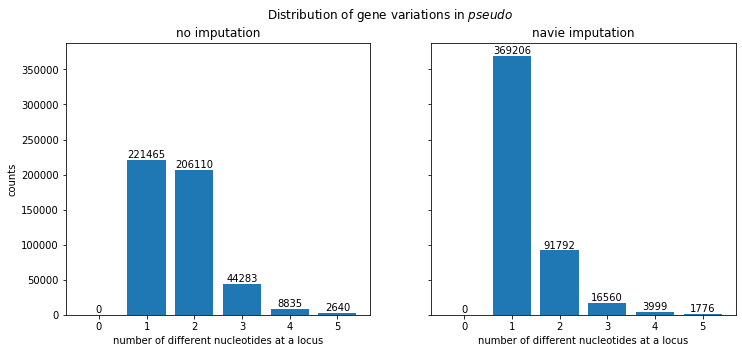

In [23]:
contrast_variation(variations_pseudo, variations_pseudo_i, 'pseudo')

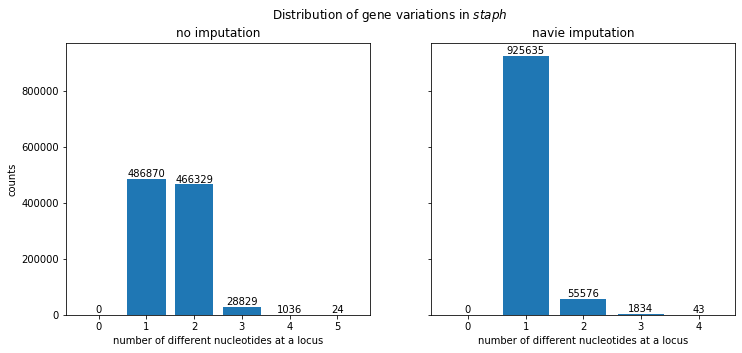

In [24]:
contrast_variation(variations_staph, variations_staph_i, 'staph')

# Missingness locations

In [24]:
%time missing_pseudo = sequence_pseudo != '-'
%time missing_pseudo_i = sequence_pseudo_i != '-'

CPU times: user 1min 40s, sys: 1.08 s, total: 1min 41s
Wall time: 1min 35s
CPU times: user 1min 45s, sys: 1.4 s, total: 1min 47s
Wall time: 1min 34s


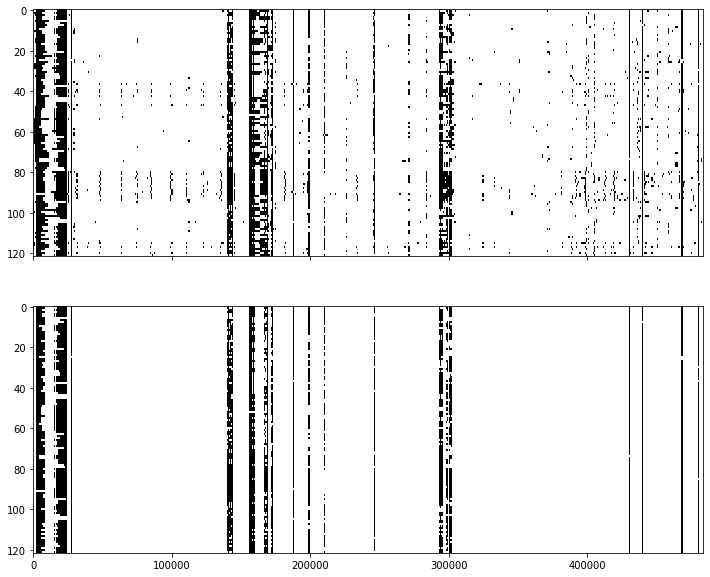

In [25]:
# plot missingness (black is missingness)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
ax1.imshow(missing_pseudo, aspect='auto', cmap='gray')
plt.imshow(missing_pseudo_i, aspect='auto', cmap='gray')
plt.show()

In [26]:
%time missing_staph = sequence_staph != '-'
%time missing_staph_i = sequence_staph_i != '-'

CPU times: user 3min 18s, sys: 2.4 s, total: 3min 21s
Wall time: 3min 13s
CPU times: user 3min 24s, sys: 2.37 s, total: 3min 26s
Wall time: 3min 12s


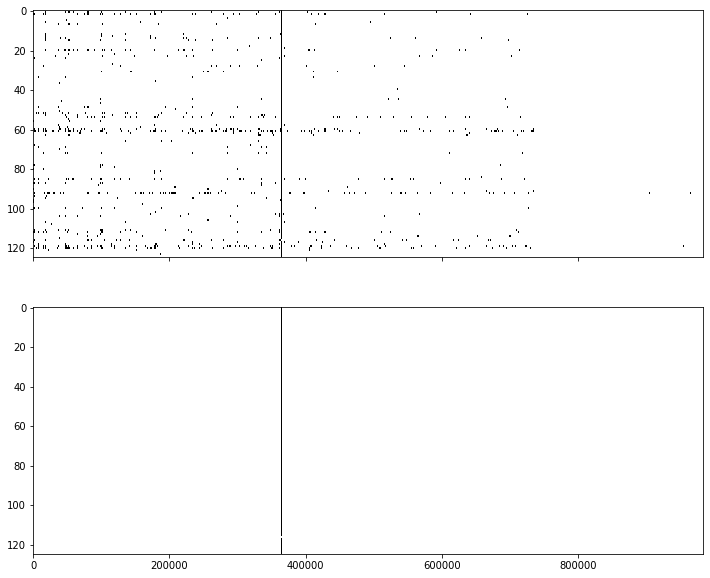

In [27]:
# plot missingness (black is missingness)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
ax1.imshow(missing_staph, aspect='auto', cmap='gray')
plt.imshow(missing_staph_i, aspect='auto', cmap='gray')
plt.show()